In [46]:
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge,Lasso


In [3]:
df = pd.read_csv(r'C:\Project_3\youtube_ad_revenue_dataset.csv')
df

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,NaN,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811


In [4]:
df = df.drop_duplicates()

In [5]:
df.shape

(120000, 12)

In [6]:
df.describe()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,120000.000000,114000.000000,114000.000000,114000.000000,120000.000000,120000.000000,120000.000000
mean,9999.832333,1099.585044,274.349842,37540.749921,16.017910,502291.970050,252.711361
std,99.918405,519.526733,129.746796,12987.818758,8.084928,288364.967705,61.954125
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603
25%,9933.000000,650.000000,162.000000,26364.159667,9.005928,252641.500000,199.892158
50%,10000.000000,1102.000000,274.000000,37522.221205,16.009269,503633.500000,252.678607
75%,10067.000000,1547.250000,387.000000,48782.739997,23.026064,752386.250000,305.613497
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              120000 non-null  object 
 1   date                  120000 non-null  object 
 2   views                 120000 non-null  int64  
 3   likes                 114000 non-null  float64
 4   comments              114000 non-null  float64
 5   watch_time_minutes    114000 non-null  float64
 6   video_length_minutes  120000 non-null  float64
 7   subscribers           120000 non-null  int64  
 8   category              120000 non-null  object 
 9   device                120000 non-null  object 
 10  country               120000 non-null  object 
 11  ad_revenue_usd        120000 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.9+ MB


Total Numbers of Missing Values in likes 6000


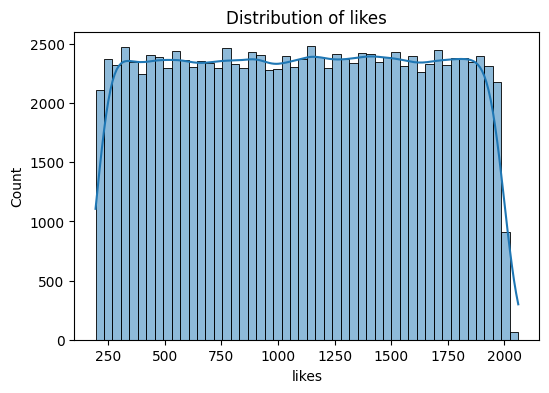

Total Numbers of Missing Values in comments 6000


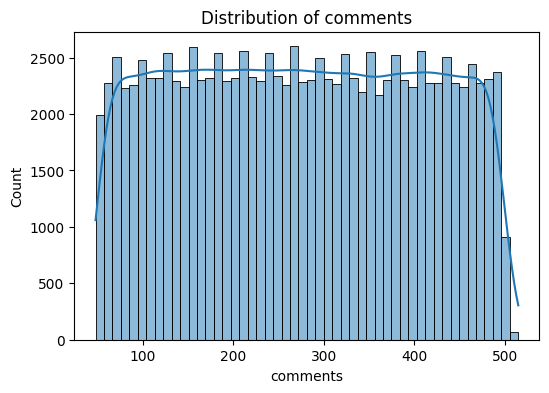

Total Numbers of Missing Values in watch_time_minutes 6000


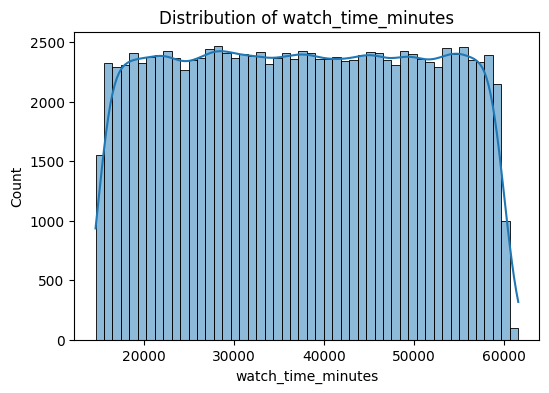

In [8]:
# Now we are exploring how many features has missing values
# And we are going to visual how there are distributed
column_list = df.columns.tolist()
for i in column_list:
        if df[i].isnull().sum() > 1:
          print(f'Total Numbers of Missing Values in {i}',df[i].isnull().sum())
          plt.figure(figsize=(6,4))
          sns.histplot(df[i],bins = 50,kde = True)
          plt.title(f'Distribution of {i}')
          plt.show()


In [9]:
# Now we are filling missing values with mean().
df['watch_time_minutes'].fillna(df['watch_time_minutes'].mean(),inplace = True)
df['comments'].fillna(df['comments'].mean(),inplace = True)
df['likes'].fillna(df['likes'].mean(),inplace = True)




C:\Users\D E L L\AppData\Local\Temp\ipykernel_17996\1999625777.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['watch_time_minutes'].fillna(df['watch_time_minutes'].mean(),inplace = True)
C:\Users\D E L L\AppData\Local\Temp\ipykernel_17996\1999625777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['watch_time_minutes'].fillna(df[

In [10]:
df.isnull().sum()

video_id                0
date                    0
views                   0
likes                   0
comments                0
watch_time_minutes      0
video_length_minutes    0
subscribers             0
category                0
device                  0
country                 0
ad_revenue_usd          0
dtype: int64

In [11]:
df.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


In [12]:
df.dtypes

video_id                 object
date                     object
views                     int64
likes                   float64
comments                float64
watch_time_minutes      float64
video_length_minutes    float64
subscribers               int64
category                 object
device                   object
country                  object
ad_revenue_usd          float64
dtype: object

In [13]:
# Now we are encoding the catgorical features
df['category'].value_counts()

category
Education        20123
Music            20065
Tech             20028
Entertainment    20025
Gaming           19974
Lifestyle        19785
Name: count, dtype: int64

In [14]:
encoding_map = {
    'Education': 1,
    'Music': 2,
    'Tech': 3,
    'Entertainment': 4,
    'Gaming': 5,
    'Lifestyle': 6
}

df['category'] = df['category'].map(encoding_map)


C:\Users\D E L L\AppData\Local\Temp\ipykernel_17996\2047077160.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = df['category'].map(encoding_map)


In [15]:
df['device'].value_counts()

device
TV         30086
Mobile     29989
Desktop    29984
Tablet     29941
Name: count, dtype: int64

In [16]:
encoding_map = {
    'TV': 1,
    'Mobile': 2,
    'Desktop': 3,
    'Tablet': 4,
    
}

df['device'] = df['device'].map(encoding_map)


C:\Users\D E L L\AppData\Local\Temp\ipykernel_17996\3169745881.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['device'] = df['device'].map(encoding_map)


In [17]:
df['country'].value_counts()

country
CA    20198
DE    20160
IN    20156
AU    19911
UK    19893
US    19682
Name: count, dtype: int64

In [18]:
encoding_map = {
    'CA': 1,
    'DE': 2,
    'IN': 3,
    'AU': 4,
    'UK': 5,
    'US': 6
    
}

df['country'] = df['country'].map(encoding_map)


C:\Users\D E L L\AppData\Local\Temp\ipykernel_17996\294307324.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].map(encoding_map)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              120000 non-null  object 
 1   date                  120000 non-null  object 
 2   views                 120000 non-null  int64  
 3   likes                 120000 non-null  float64
 4   comments              120000 non-null  float64
 5   watch_time_minutes    120000 non-null  float64
 6   video_length_minutes  120000 non-null  float64
 7   subscribers           120000 non-null  int64  
 8   category              120000 non-null  int64  
 9   device                120000 non-null  int64  
 10  country               120000 non-null  int64  
 11  ad_revenue_usd        120000 non-null  float64
dtypes: float64(5), int64(5), object(2)
memory usage: 11.9+ MB


In [20]:
# Feature wise analysis :
# column_1 and 2 : video_id,date ( # drop ID and date (not useful for prediction))
df = df.drop(columns = ['video_id','date'])

In [21]:
# Now we are deriving the new feature called engagement rate = (likes + comments) / views). To bring our model with more accuracy
df['engagement_rate'] = (df['likes'] + df['comments'] / df['views'])

In [22]:
# Train and Split Test
X = df.drop(columns= ['ad_revenue_usd'])
y = df['ad_revenue_usd']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((96000, 10), (24000, 10), (96000,), (24000,))

In [24]:
df.head()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement_rate
0,9936,1221.0,320.0,26497.214184,2.862137,228086,4,1,3,203.178237,1221.032206
1,10017,642.0,346.0,15209.747445,23.738069,736015,5,4,1,140.880508,642.034541
2,10097,1979.0,187.0,57332.658498,26.200634,240534,1,1,1,360.134008,1979.018520
3,10034,1191.0,242.0,31334.517771,11.770340,434482,4,2,5,224.638261,1191.024118
4,9889,1858.0,477.0,15665.666434,6.635854,42030,1,2,1,165.514388,1858.048235
